In [1]:
import pandas as pd

df = pd.read_csv('accidents_2017.csv')
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [2]:
df.columns

Index(['Id', 'District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [3]:
# List of columns names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [4]:
import numpy as np

# Apparently, there are not null values

df.isnull().sum().any()

# False meaning there are not null values

# replace Unknown with n.a

df.replace('Unknown', np.nan, inplace=True)

# Now, there are null values
df.isnull().sum().any()

#True

#Access number of null values using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10312 non-null  object 
 2   Neighborhood Name  10312 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


## We can analyze where accident happened using the longitude and Latitude


### Before we start to draw conclusions using our data, we are going to clean it. The first cleaning step consists of droping unnessary columns to simplify the data frame

## Data cleaning

In [5]:
# Drop unnecessary columns
df.drop(['District Name', 'Neighborhood Name', 'Part of the day',], axis=1, inplace=True)

#columns after dropping
df.columns

Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

#### Change columns names. replace spaces by underscore and upper case letters.

In [6]:
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)
df.columns

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude'],
      dtype='object')


#### Add a column with the year in this case 2017


In [7]:
df['year']=np.repeat(2017, df.shape[0])
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


##### we can combine weekday, month, day, hour, and year into one single column called date.
                And to avoid a ValueError, we have to convert month names into integers before using the pandas.to datetime function


In [8]:
# Obtain month names
list(df.month.unique())

#Month names to int
month_to_int = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

#convert month names to numbers
df['month'].replace(month_to_int, inplace=True)

#obtain new month names
list(df.month.unique())

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

### Combine columns month day and year to create a single datetime column


In [9]:
df['date']=pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


## Since we can access all the information we need related to the date of the accident

In [10]:
# Extract the year
df['date'].dt.year

# Extract the month
df['date'].dt.month

# Extract the day
df['date'].dt.day

# Extract the hour
df['date'].dt.hour

# Extract the day of the week
df['date'].dt.dayofweek

# Day of the week - first five elements of the returned serie.
df['date'].dt.dayofweek.head()

0    4
1    4
2    4
3    4
4    3
Name: date, dtype: int64

## Then we can drop columns month, year, day and day of the week

In [11]:
#Drop columns hour, day, month, year, weekday

df.drop(['hour', 'day', 'month', 'year', 'weekday'], axis=1, inplace=True)


### Finally we can drop the street column as well since we are going to visualize where the accidents happened using longitude and latitude

In [12]:
df.drop(['street'], axis=1, inplace=True)

In [13]:
df.head()

,id,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


## To easly access information about car accident, we are going to set aside id as the index of the data frame, removing before the trailing spaces in id entries

In [14]:
# We have noticed that id has spaces at the end of the string
df.id.loc[0]
# '2017S008429    '

# We remove the spaces in the entries of id
df.id = df.id.apply(lambda x: x.strip())

#We have removed the spaces successfully
df.id.loc[0]
#'2017S008429'

# we can set id index as the index of the dataframe
df.set_index('id', inplace=True)

# now we can easly access information about an accident using its id.
df.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                        2.12562
latitude                           41.34
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

## The final step of data cleaning step consists of evaluating whether there are duplicated entries in the data frame. If so we will remove these duplicates as they represent same car accident

In [15]:
# Assess whether or not the dataframe contains duplicated rows
df.duplicated().sum()
# 9

#print duplicated rows.
df[df.duplicated()]

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


### Shape the dataframe before remvoing the duplicated column

In [16]:
df.shape

# (10339, 7)

# Drop duplicates

df.drop_duplicates(inplace=True)

df.shape

#(10330, 7)

(10330, 7)

# Time Analysis

## How many accidents were rgistered by the police in Bercelona in 2017
    We can easly obtain the total number of accidents registered in bercelona 2017 by using the pandas.Dataframe.shape attribute, since each entry of the data frame represent a different car accident

In [17]:
print(f'Total number of accidents in 2017 :{(df.shape[0])}')


Total number of accidents in 2017 :10330


#### Distribution of car accidents per month

In [18]:
import calendar

#Number of accidents per month

accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by names
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      844
February     823
March        935
April        841
May          962
June         907
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

Text(0, 0.5, 'Number of accidents')

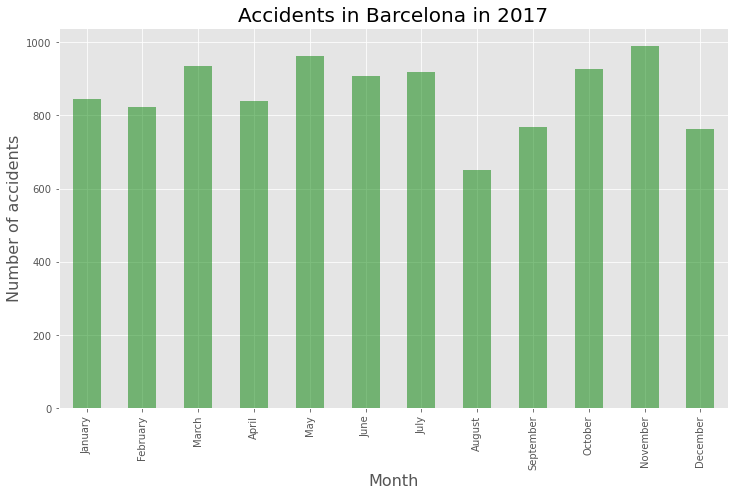

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#plot accidents per month
accidents_month.plot(kind='bar', figsize=(12,7), color='green', alpha=0.5)

#title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)

## Interpleting the table, we can observe the number of accidents decreases in August and December. One reason could be that fewer people are driving to work in these months

### Distribution of car accidents per day of the week
    We can analyze the distribution of car accidents according to the day of the week by using bar plot as well

Text(0, 0.5, 'Number of accidents')

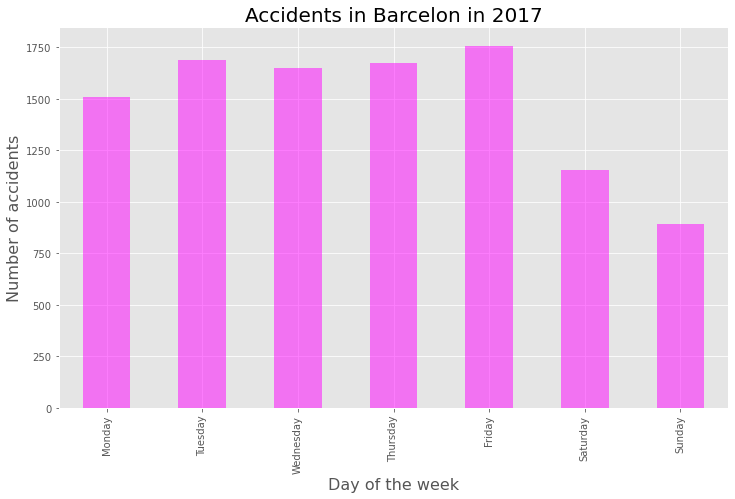

In [20]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

#Replace the day integer by names
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

#plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelon in 2017', fontsize=20)
plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)

### Interplet the graph
    There are few accidents on weekend
    
    
### The next plot depicts the number of accidents during each day of the year. 
    As we can see observe, there are between 10-50 accidents per day and the number of accidents on friday are as a rule much higher than the number of accidents on sunday

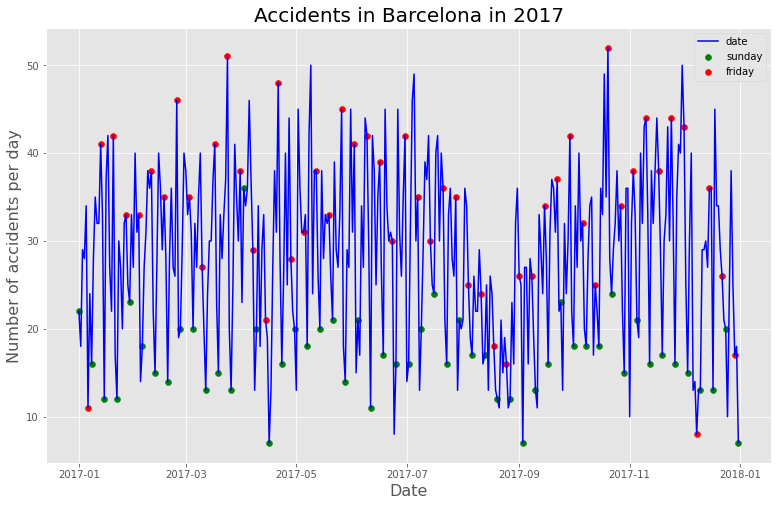

In [21]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

#sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

#Friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

#Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

#### Distribution of accidents per hour


Text(0, 0.5, 'Number of accidents')

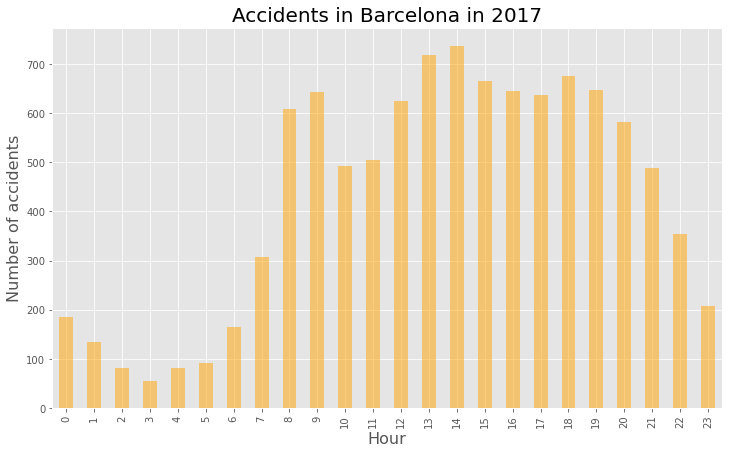

In [22]:
accidents_hour = df.groupby(df['date'].dt.hour).count().date


#plot accidents per hour

accidents_hour.plot(kind='bar', figsize=(12,7), color='orange', alpha=0.5)

#title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16)

##### As we can see the number of accidents occur in early-morning hours 8-9 and between 12-20

### Distribution of car accidents per day of the week and hour
    We can analyze the number of accidents per day of the week and hour using as side-by-side bar plot and in this case we use holizontal plot for better visualization

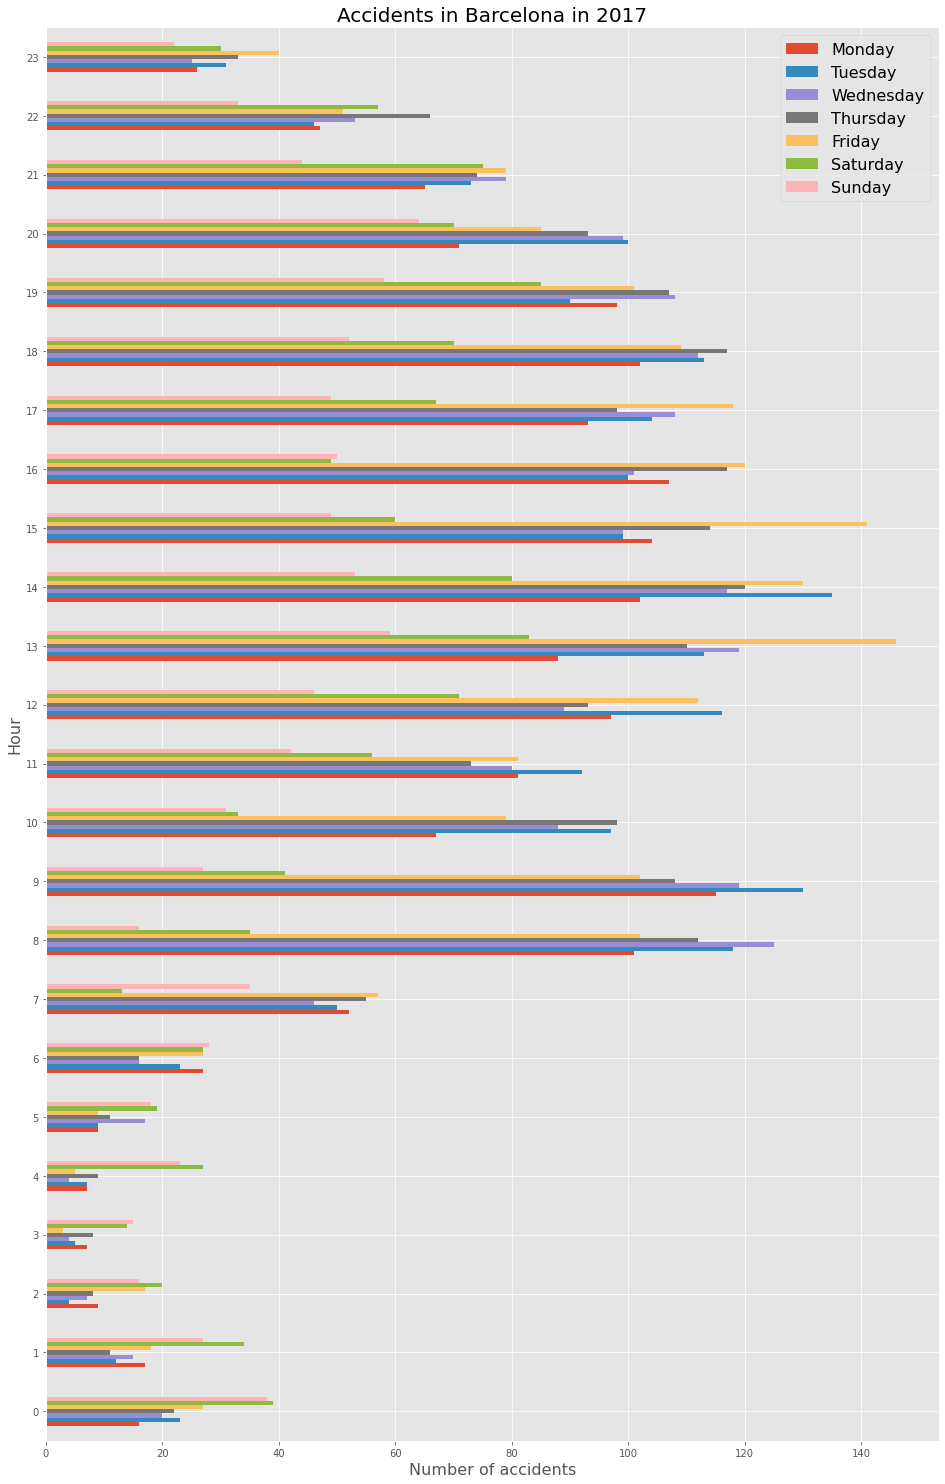

In [23]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date
accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

#title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

#### As we can easily observe, there are more accidents at night on weekends than during weekdays. On the contrary, there are much more accidents from early-morning(8) till afternoon (19) during the weekdays 

### Time analysis --- conclusions
    1. August presents the lowest number of car accidents 651 and 2017. The rest of the months present a number of accidents around 800-900
    2. The number of accidents decrease on weekends.
    3. The greater number of  car accidents occurs from (8-9) and (12-20).
    4. At night most of the accidents happen on the weekends.
    
    
We can always group by different temporal variables and create more complex plots in order to extract more complicated patterns and conclusions in regard to time dependency.

# Types of accident analysis
    The data we are analyzing contains information related to (1) the date od accident, 
    (2) the type of accident, 83) the location of the accident. 
    Regarding the type of the accident the data frame includes information such as 
    the number of victims, the number vehicles involved in the accident, and 
    the type of injuries (mild or serious). As before, we can examin the distribution
    of all those variables using bar plots.
    
    
# Vehicles inlvolved
    The previous plot depicts the number of accidents in 2017 according to the
    number of vehicles involved. In most accidents, two vehicles were involved
    (7028 accidents in 2017). Furthermore, the police recorded car accidents 
    where up to 14 vehicles were involved; however, car accidents with many vehicles are not common.
    
    

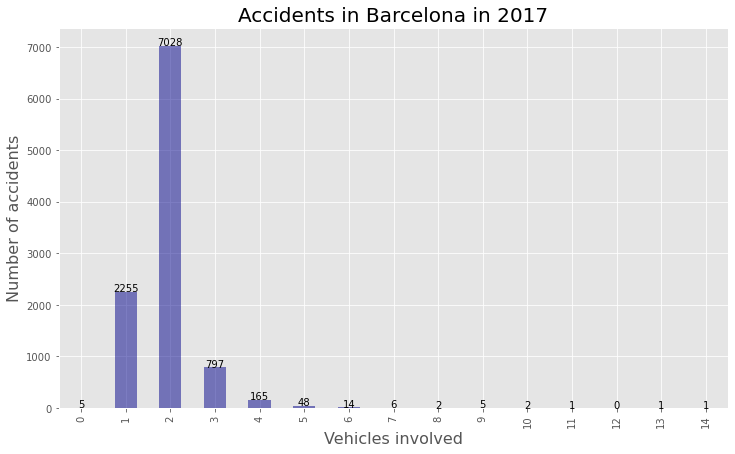

In [25]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our serie for better visualization
vehicles_involved[12]=0
vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Vehicles involved', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)

#print a label involved above each bar indicating the number of accidents

for index in vehicles_involved.index:
    plt.text(x=index, y=vehicles_involved.loc[index], s=str(vehicles_involved.loc[index]),
            horizontalalignment='center')

## Mild--Serious injuries
    The data frame includes informationa about how many victims suffered mild and
    serious injuries in each car accident. We can easly represent the percent of mild
    and serious injuries using a pie plot as follows:

Text(0, 0.5, '')

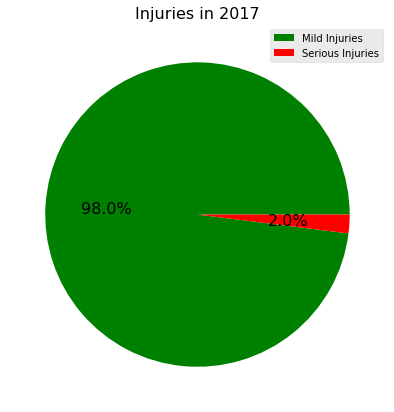

In [28]:
# Serie with number of mild injuries and serious injuries
injuries = df[['mild_injuries','serious_injuries']].sum()

# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

## T
    The plot shows that only 2% of the injuries are serious injuries.
    Although most of the injuries in car accidents were mild, it would be interesting
    to analyze under which circumstances (time, date, location) serious injuries are more frequent.

### T
    The following plot shows the percentage of injuries according to the day of the week. 
    Mild injuries follow an expected pattern, since they present higher rates during weekdays,
    when more accidents happen. However, serious injuries present high rates on weekends, 
    although the average number of accidents on weekends (1656) is lower than during 
    weekdays (1025). This indicates that accidents on weekends tend to be more severe than during weekdays.

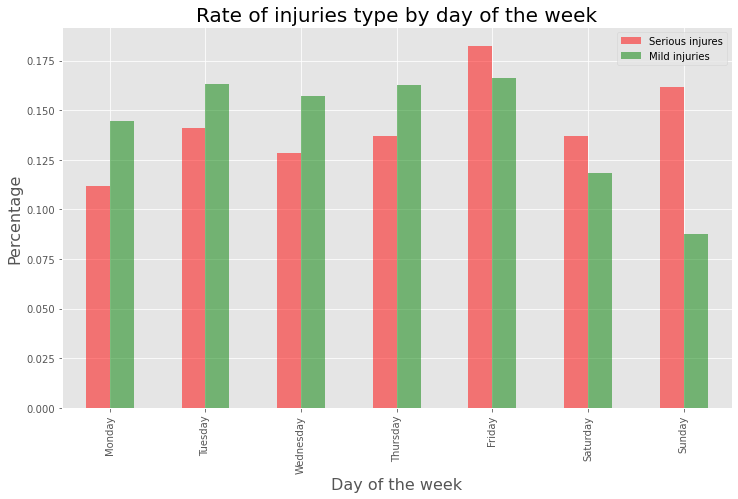

In [29]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);